In [5]:
# percobaan 

In [6]:
# JUDUL SAYA 

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
# Load the dataset
file_path = 'C:/Semester 4/Pembelajaran Mesin/UAS ML/data.csv'
data = pd.read_csv(file_path)

In [9]:
# Display the first few rows of the dataset
data.head()


,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [10]:
# Split the data into features (X) and target (y)
X = data['Sentence']  # Assuming the text column is named 'text'
y = data['Sentiment']  # Assuming the sentiment column is named 'sentiment'

In [11]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [13]:
# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


LogisticRegression()

In [14]:
# Make predictions on the test set
y_pred = model.predict(X_test_tfidf)


In [15]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.7194183062446535


In [16]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.50      0.15      0.24       175
     neutral       0.71      0.90      0.80       622
    positive       0.77      0.69      0.72       372

    accuracy                           0.72      1169
   macro avg       0.66      0.58      0.59      1169
weighted avg       0.70      0.72      0.69      1169



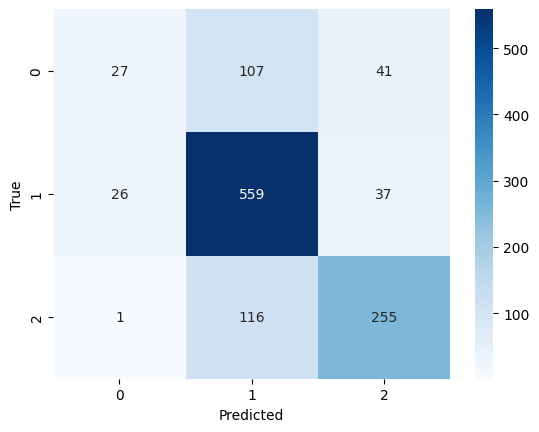

In [17]:
# Display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()